<a href="https://colab.research.google.com/github/Ultra-lion/LinearRegressionFromScratch/blob/main/LinearRegressionFromScratchOnly1Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5945.955710285395
---------------------------------: 0
5231.568467955059
---------------------------------: 100
4781.006664902594
---------------------------------: 200
4494.369416878534
---------------------------------: 300
4310.436198283137
---------------------------------: 400
4191.386530333106
---------------------------------: 500
4113.667516834409
---------------------------------: 600
4062.4937474606118
---------------------------------: 700
4028.5094856156215
---------------------------------: 800
4005.7476603011314
---------------------------------: 900
3990.372388244297
---------------------------------: 1000
3979.8984078960125
---------------------------------: 1100
3972.702929922602
---------------------------------: 1200
3967.718091489294
---------------------------------: 1300
3964.2357655581727
---------------------------------: 1400
3961.7827709562375
---------------------------------: 1500
3960.0405107632355
---------------------------------: 1600
3958.792847629897
-

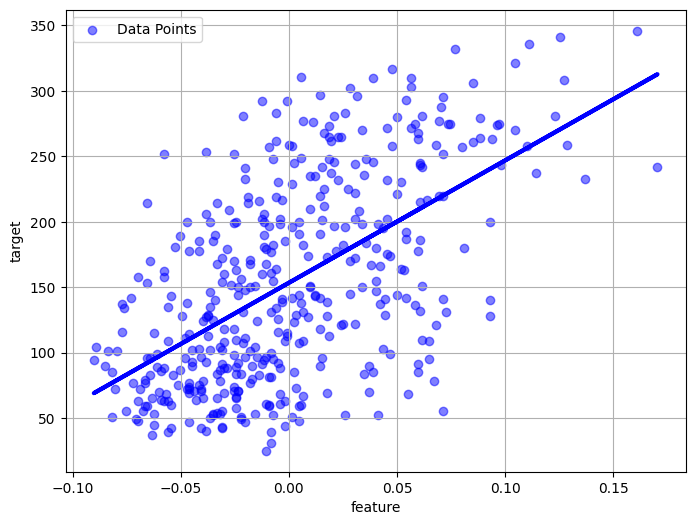

Mean squared error: 3955.25 of custom


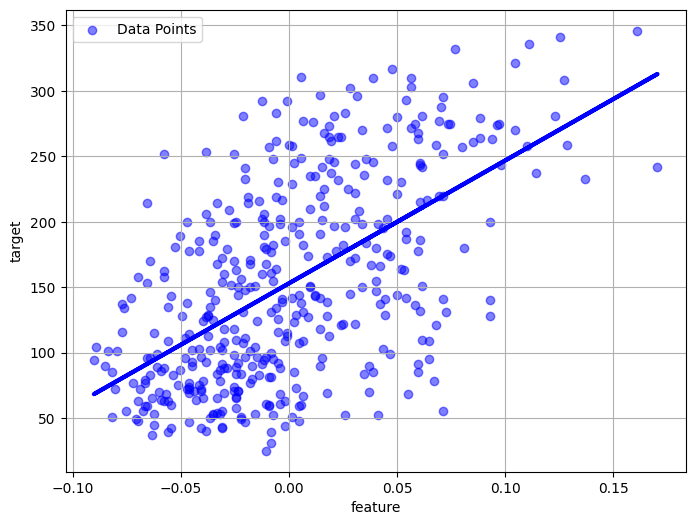

Mean squared error: 3955.02 of sklearn


In [19]:
import sklearn
from sklearn import  linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def linearPredict(tdata, weights, bias):
  pred = np.dot(tdata, weights) + bias
  return pred

def mserror(predictions, targets, totalLength):
  return np.sum((targets-predictions)**2)/totalLength

def getGradient(trainData, predictions, target):
  error = (target - predictions)
  transposedTrainDataMat = np.transpose(trainData)
  gradient = -2/len(trainData) * np.dot(transposedTrainDataMat, error)
  return gradient

def updateWeights(weights, gradient, learning_rate):
  return weights-learning_rate*gradient


def drawData(trainData, trainTargets, predictions):
  plt.figure(figsize=(8, 6))
  plt.scatter(trainData, trainTargets, marker='o', c='b', alpha=0.5, label='Data Points')
  plt.plot(trainData, predictions, color="blue", linewidth=3)
  plt.xlabel('feature')
  plt.ylabel('target')
  plt.grid(True)
  plt.legend()
  plt.show()


diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

learning_rate = 0.5
num_epochs = 10000


weights  = np.random.rand(1)
bias = sum(diabetes_y_train)/len(diabetes_y_train)
for i in range(num_epochs):
  predictions = linearPredict(diabetes_X_train, weights, bias)
  # mse = mserror(predictions, diabetes_y_train, len(diabetes_y_train))
  mse = mean_squared_error(diabetes_y_train, predictions)
  gradient = getGradient(diabetes_X_train, predictions, diabetes_y_train)
  weights = updateWeights(weights, gradient, learning_rate)
  if(i%100==0):
    if(i%100==0 and learning_rate>0.001):
      learning_rate -= 0.01
    print(mse)
    print('---------------------------------: '+ str(i))
customPredict = linearPredict(diabetes_X_train, weights, bias)
drawData(diabetes_X_train, diabetes_y_train, customPredict)
print("Mean squared error: %.2f of custom" % mean_squared_error(diabetes_y_train, customPredict))

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred_regr = regr.predict(diabetes_X_train)
drawData(diabetes_X_train, diabetes_y_train, diabetes_y_pred_regr)
print("Mean squared error: %.2f of sklearn" % mean_squared_error(diabetes_y_train, diabetes_y_pred_regr))
